# INTRODUCTION

**Oasis Infobyte - "DATA SCIENCE INTERN"**

AUTHOR - NIKHIL ESHWAR T

TASK-1- Iris Flowers Classification ML Project :

## IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## LOADING THE DATASET

In [ ]:
df=pd.read_csv('iris_data.csv',names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species'])

## DISPLAYING THE VALUES

In [ ]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EXPLORATORY DATA ANALYSIS

THIS DATASET HAS 150 ROWS & 5 COLUMNS

In [ ]:
df.shape

(150, 5)

In [ ]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


CHECKING DUPLICATE VALUES

In [ ]:
df.duplicated().sum()

3

DUPLICATE VALUES ARE REMOVED

In [ ]:
df.drop_duplicates(inplace=True)

CHECKING NULL VALUES

In [ ]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

CHECKING UNIQUE VALUES IN EACH COLUMN

In [ ]:
df.nunique()

Sepal Length    35
Sepal Width     23
Petal Length    43
Petal Width     22
Species          3
dtype: int64

In [ ]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

In [ ]:
columns=df.columns
print(columns)

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'],
      dtype='object')


<ipython-input-13-403c5205847e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[i]])
<ipython-input-13-403c5205847e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[i]])
<ipython-input-13-403c5205847e>:5: UserWarning: 

`distplot` is a deprecated function and will be remo

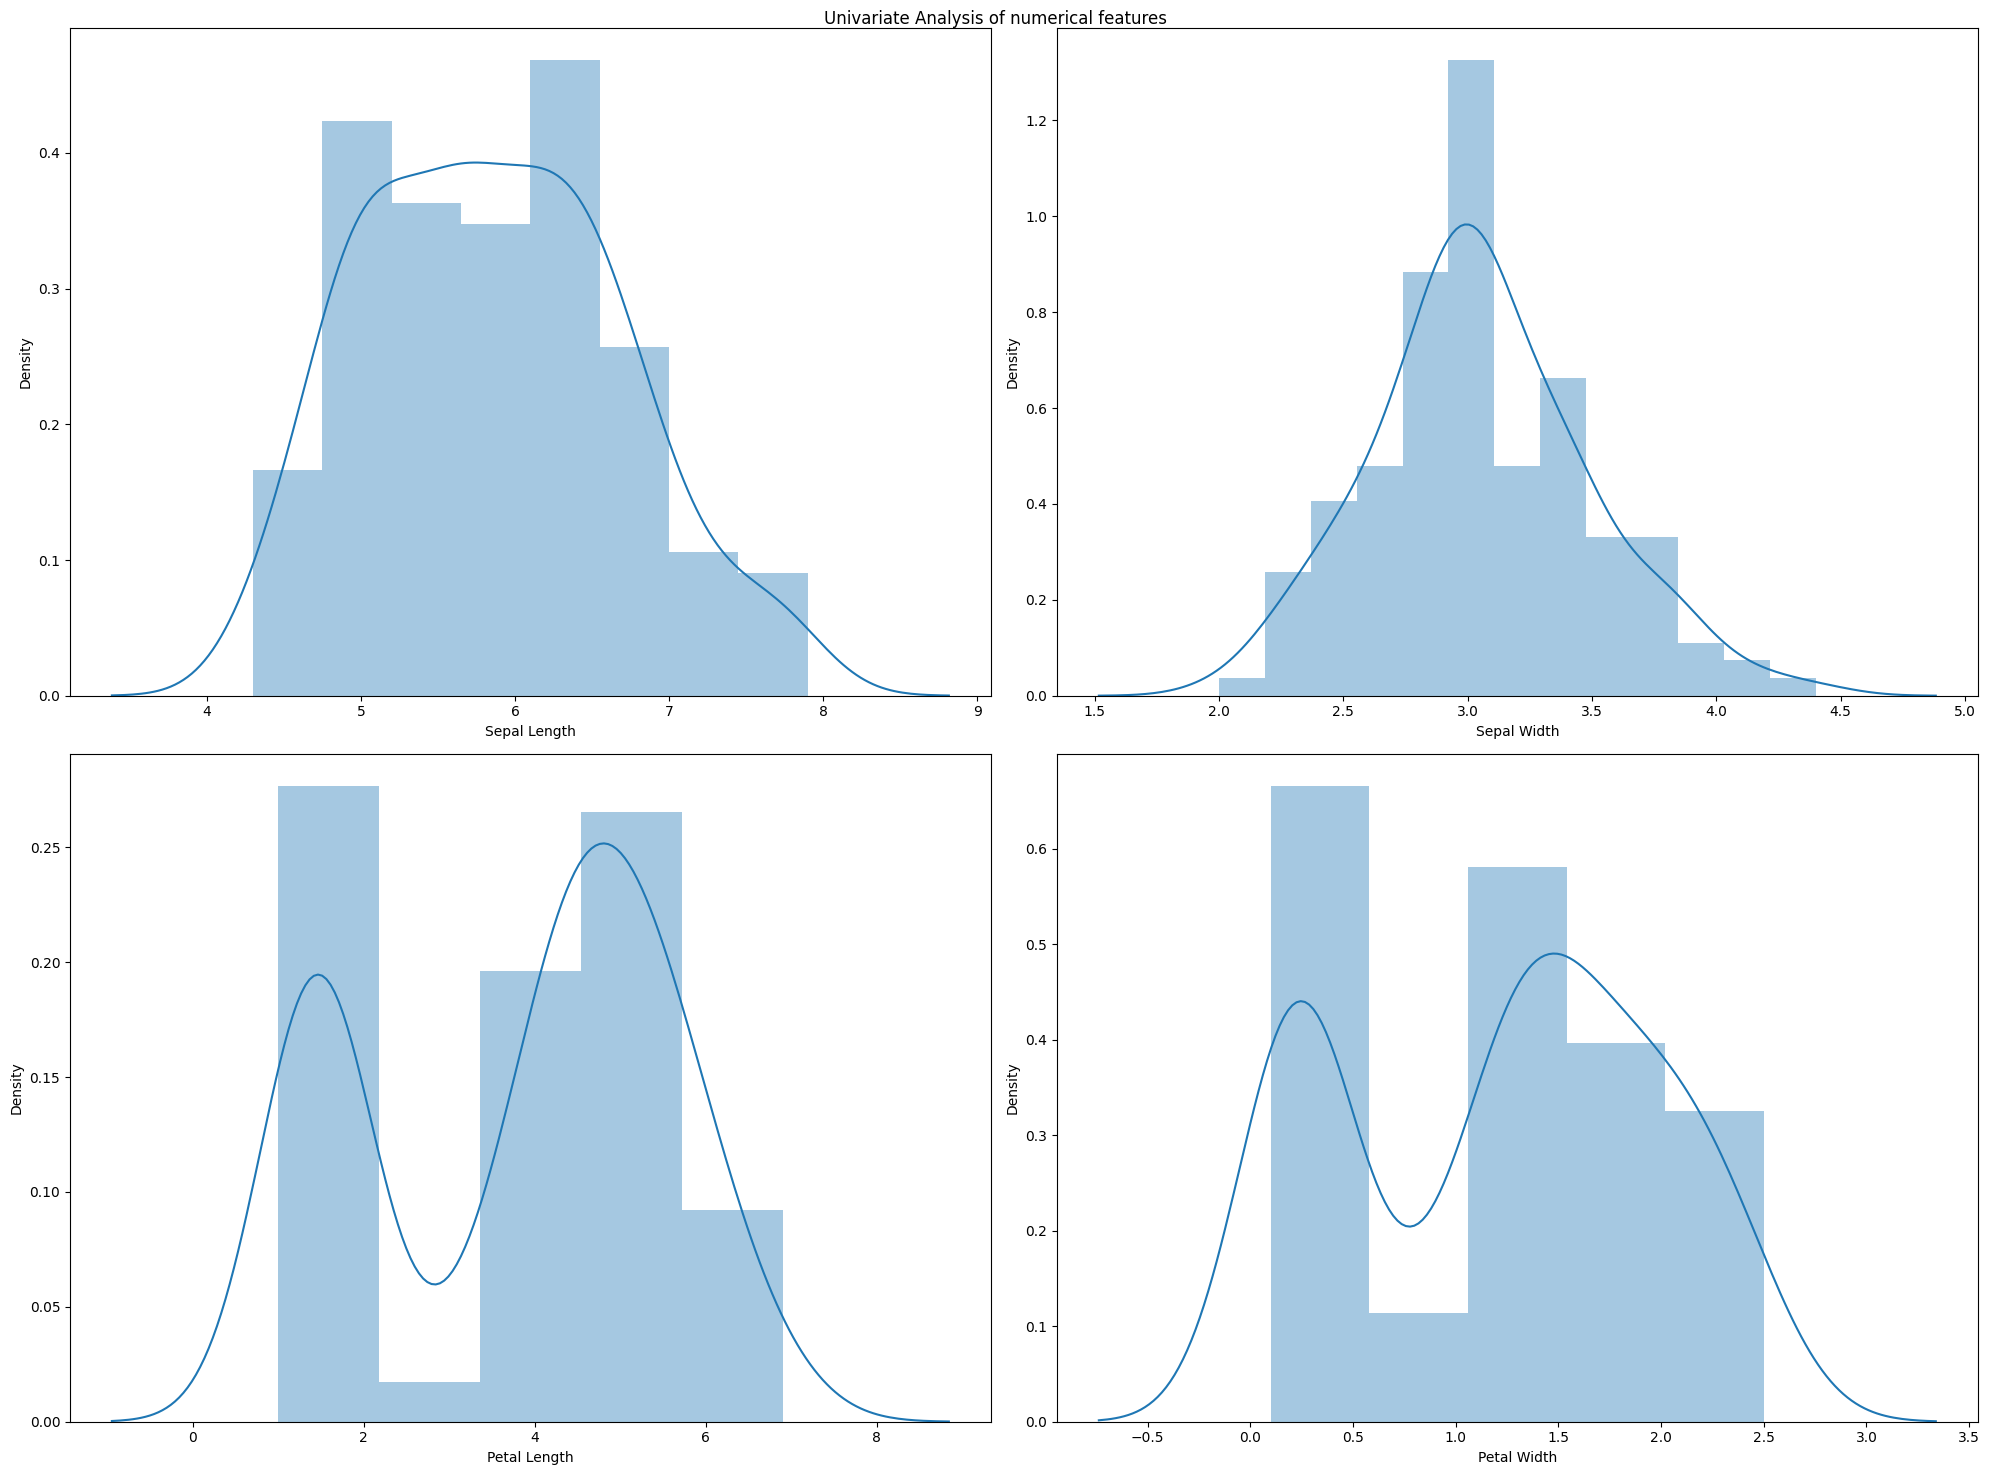

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of numerical features')
for i in range(0,len(columns)-1):
  plt.subplot(2,2,i+1)
  sns.distplot(df[columns[i]])
  plt.xlabel(columns[i])
  plt.tight_layout()



SEPAL LENGTH & SEPAL WIDTH ARE NORMALLY DISTRIBUTED

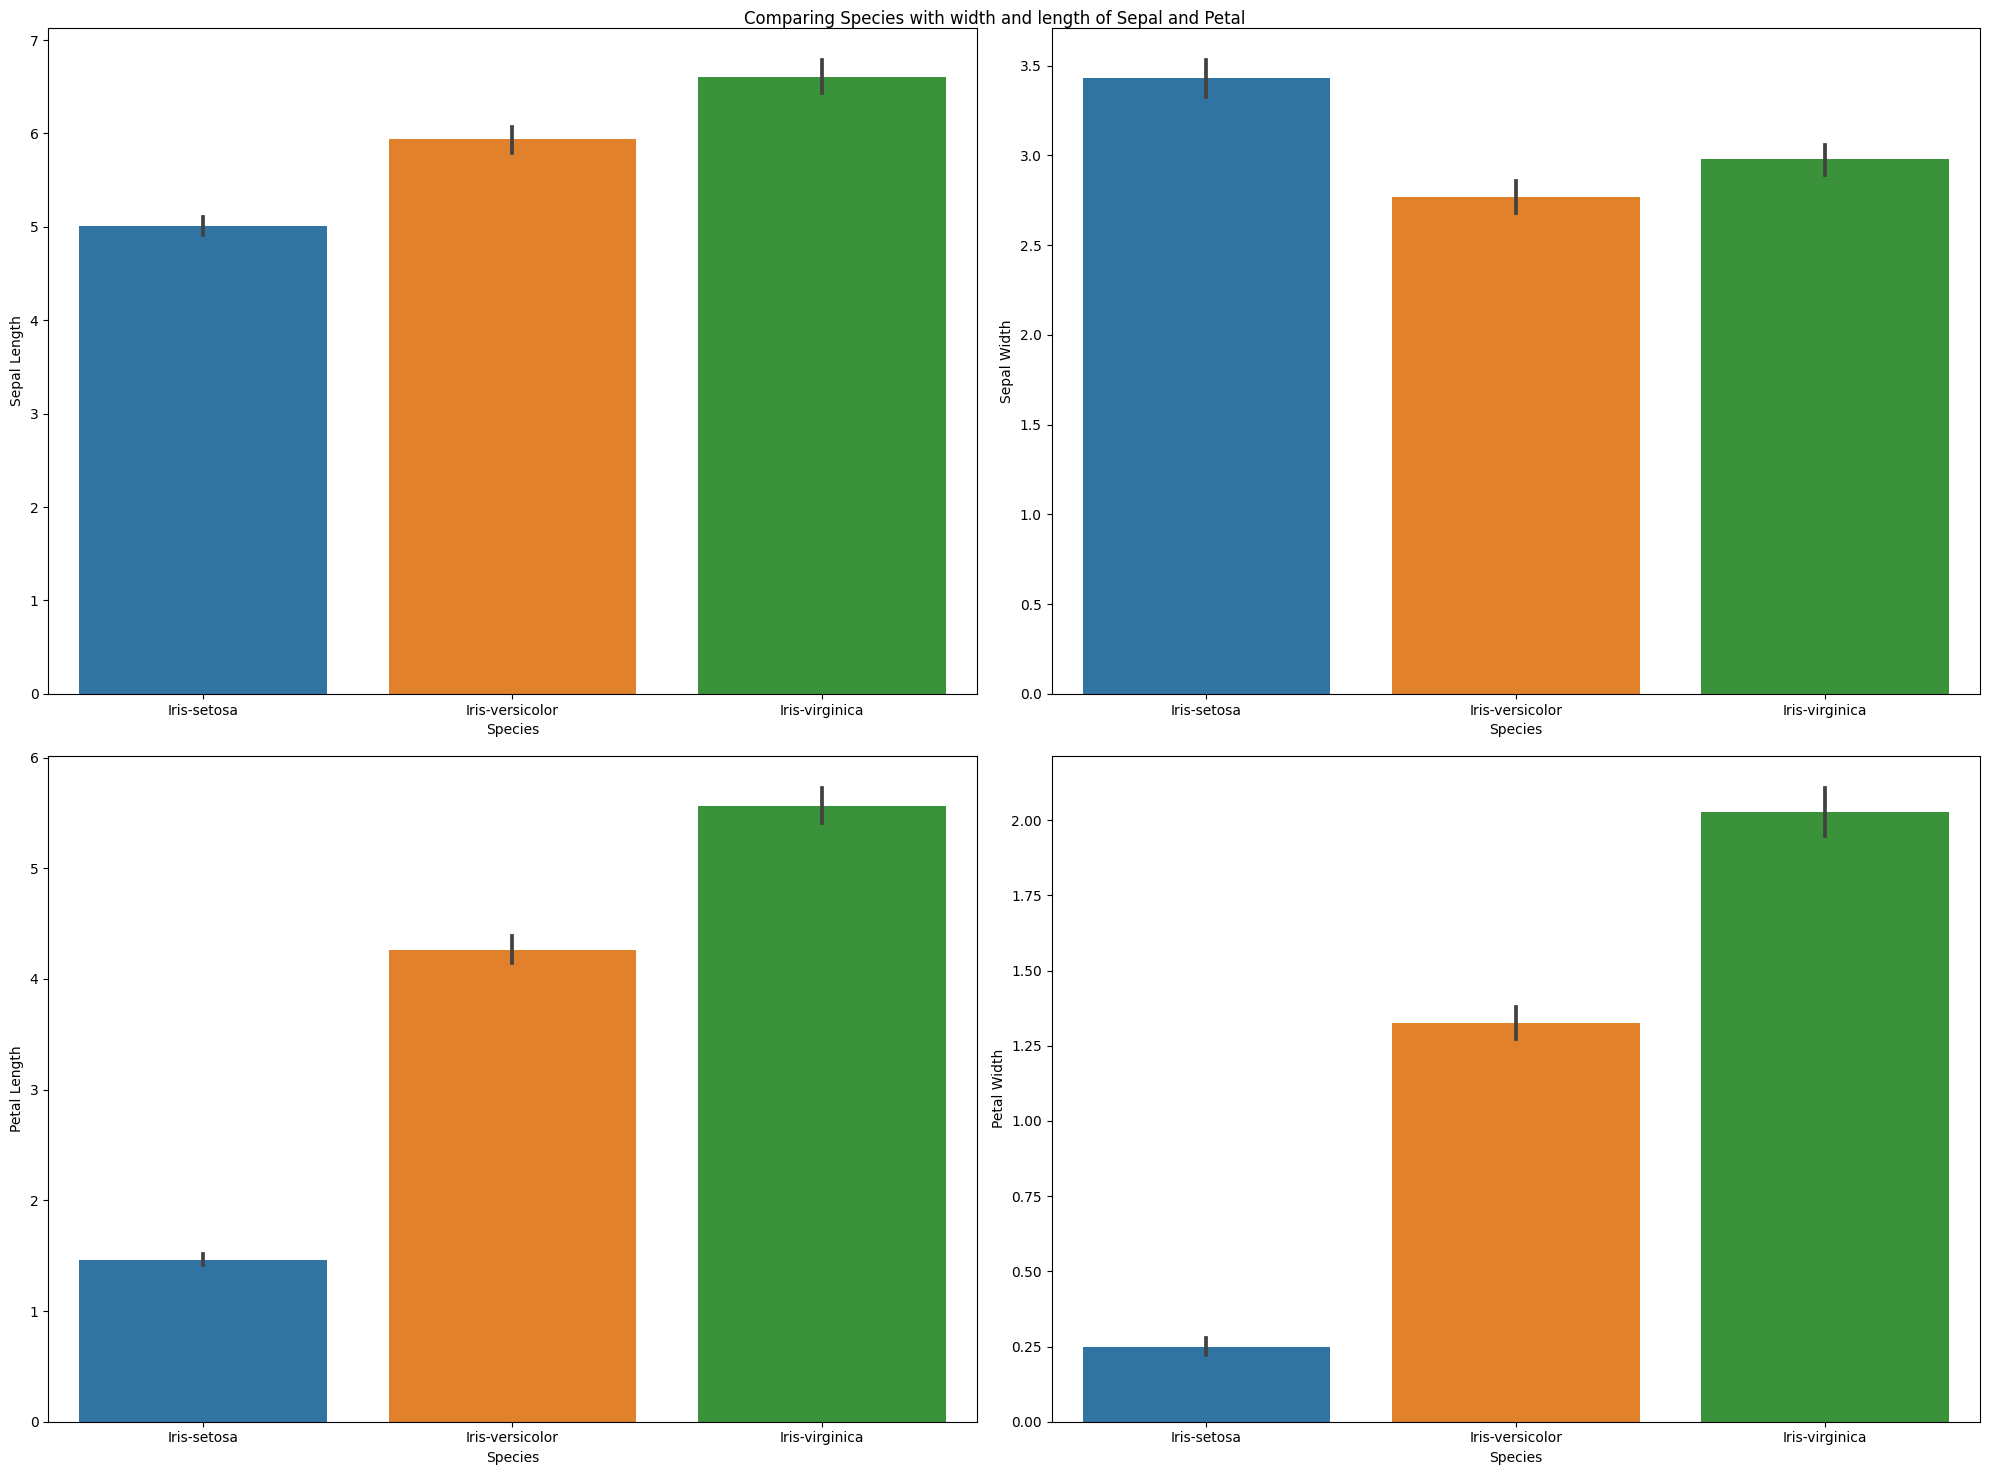

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle('Comparing Species with width and length of Sepal and Petal')
for i in range(0,len(columns)-1):
  plt.subplot(2,2,i+1)
  sns.barplot(x='Species',y=columns[i],data=df)

  plt.tight_layout()


ORDER OF SPECIES WITH RESPECT TO HIGHEST SEPAL LENGTH:

  1.IRIS-VIRGINICA

  2.IRIS-VERSICOLOR

  3.IRIS-SETOSA

ORDER OF SPECIES WITH RESPECT TO HIGHEST SEPAL WIDTH:

  1.IRIS-SETOSA

  2.IRIS-VIRGINICA

  3.IRIS-VERSICOLOR

ORDER OF SPECIES WITH RESPECT TO HIGHEST PETAL LENGTH:

  1.IRIS-VIRGINICA

  2.IRIS-VERSICOLOR

  3.IRIS-SETOSA

ORDER OF SPECIES WITH RESPECT TO HIGHEST PETAL WIDTH:

  1.IRIS-VIRGINICA

  2.IRIS-VERSICOLOR

  3.IRIS-SETOSA

<Axes: xlabel='Species', ylabel='count'>

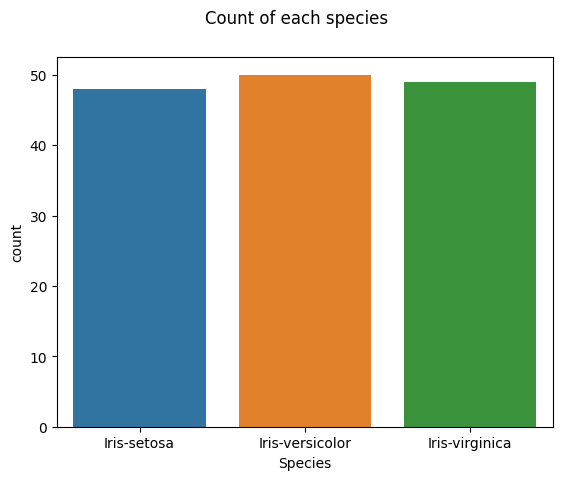

In [ ]:
plt.suptitle('Count of each species')
sns.countplot(x='Species',data=df)

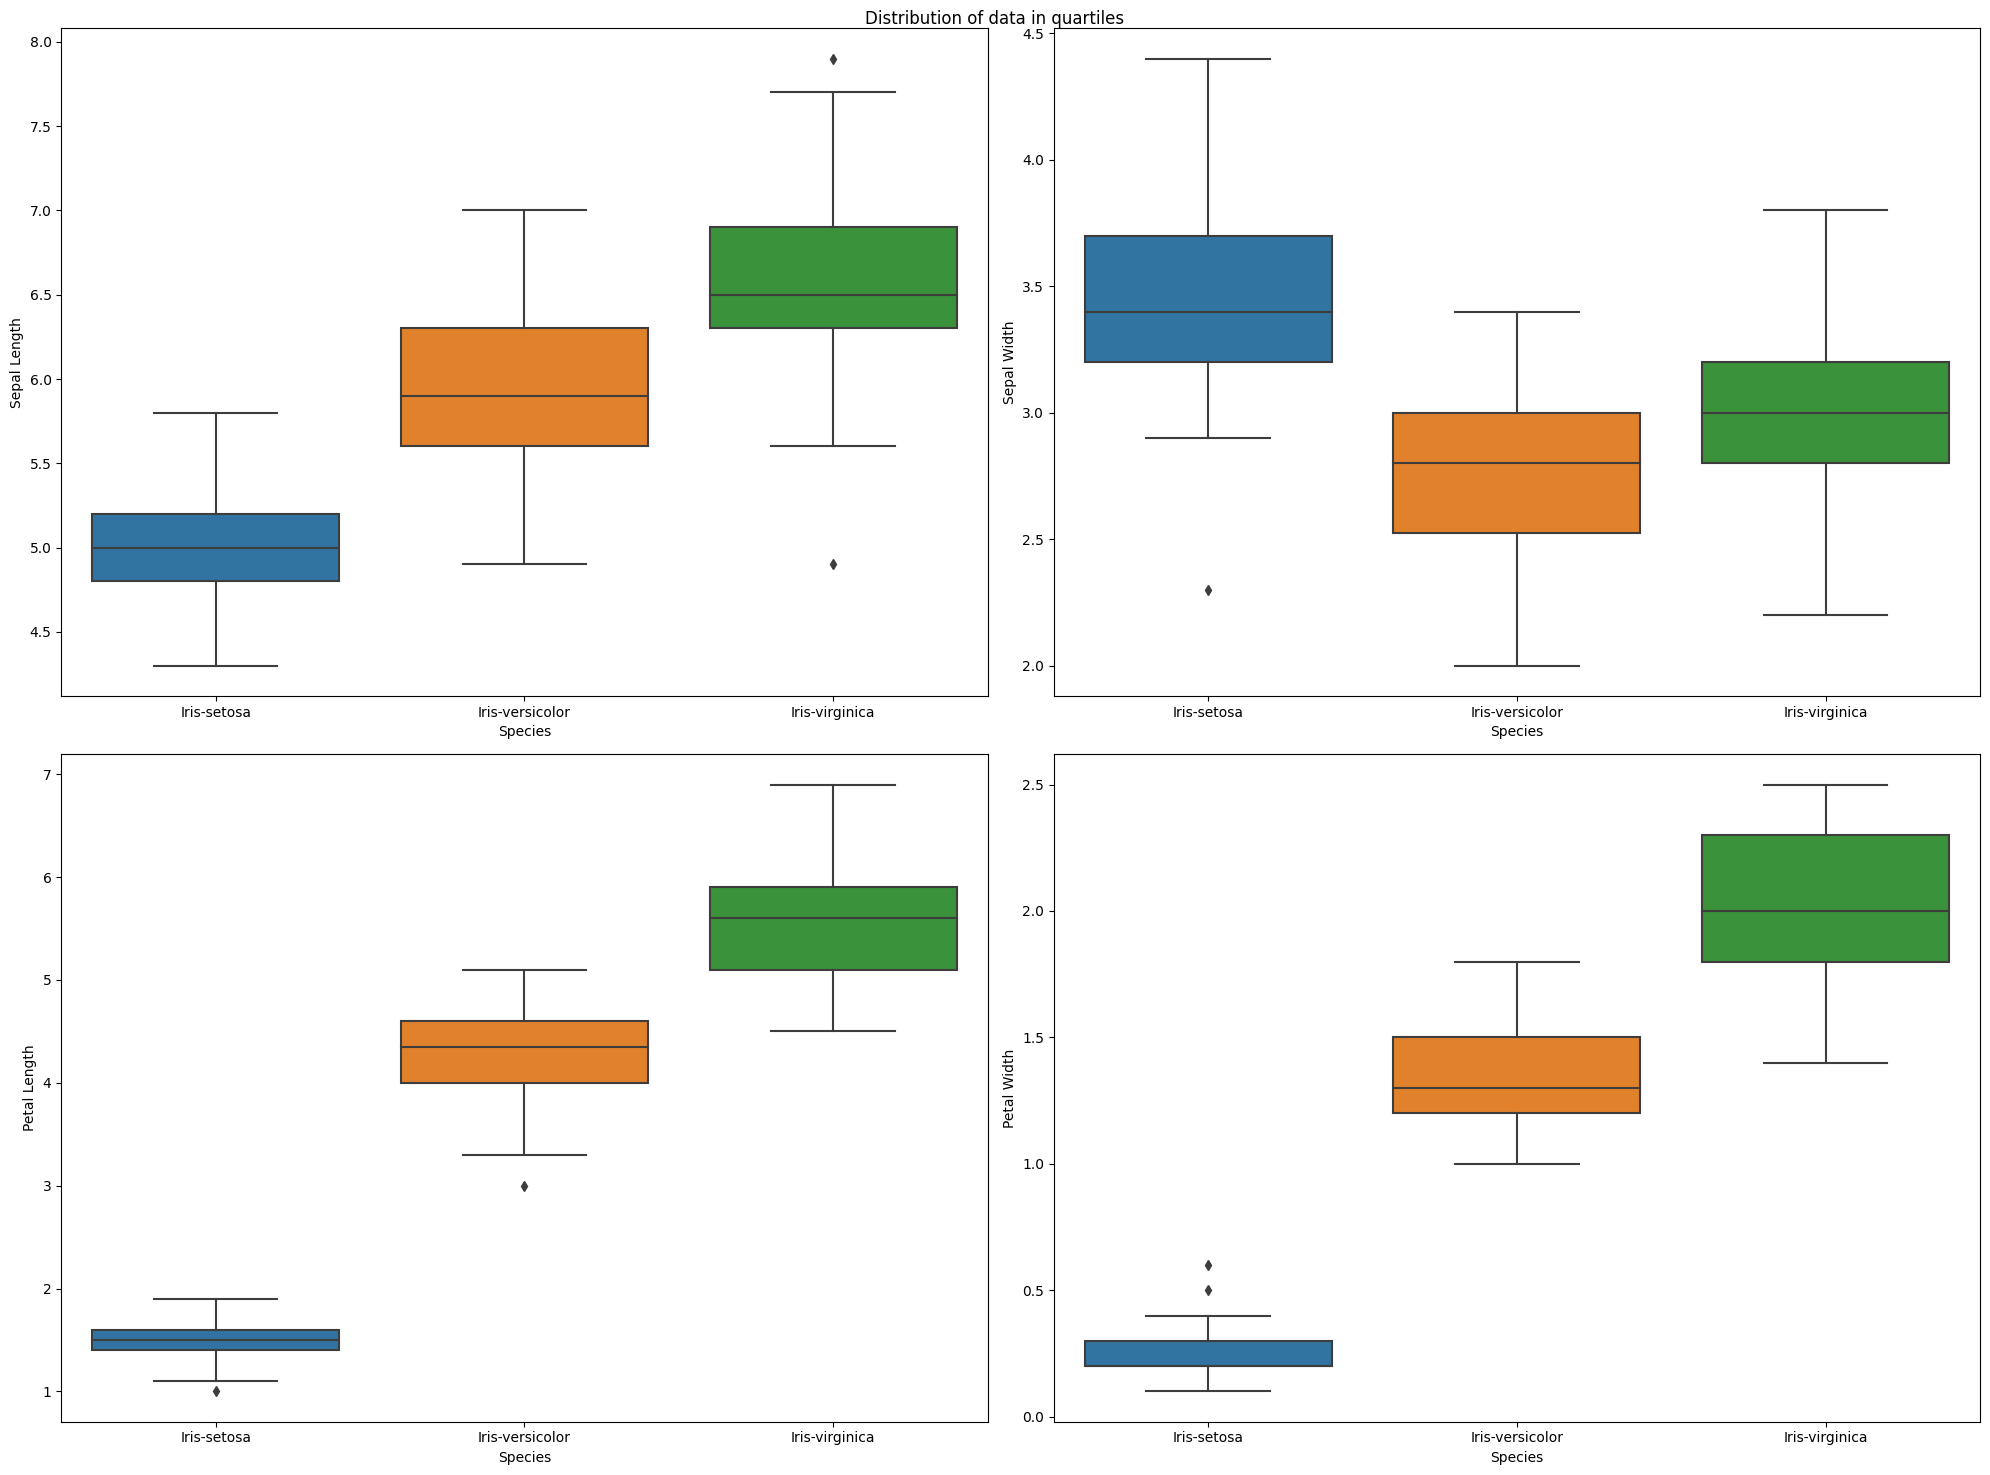

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle('Distribution of data in quartiles')
for i in range(0,len(columns)-1):
  plt.subplot(2,2,i+1)
  sns.boxplot(x='Species',y=columns[i],data=df)

  plt.tight_layout()

DATA DOESN'T HAVE MANY OUTLIERS

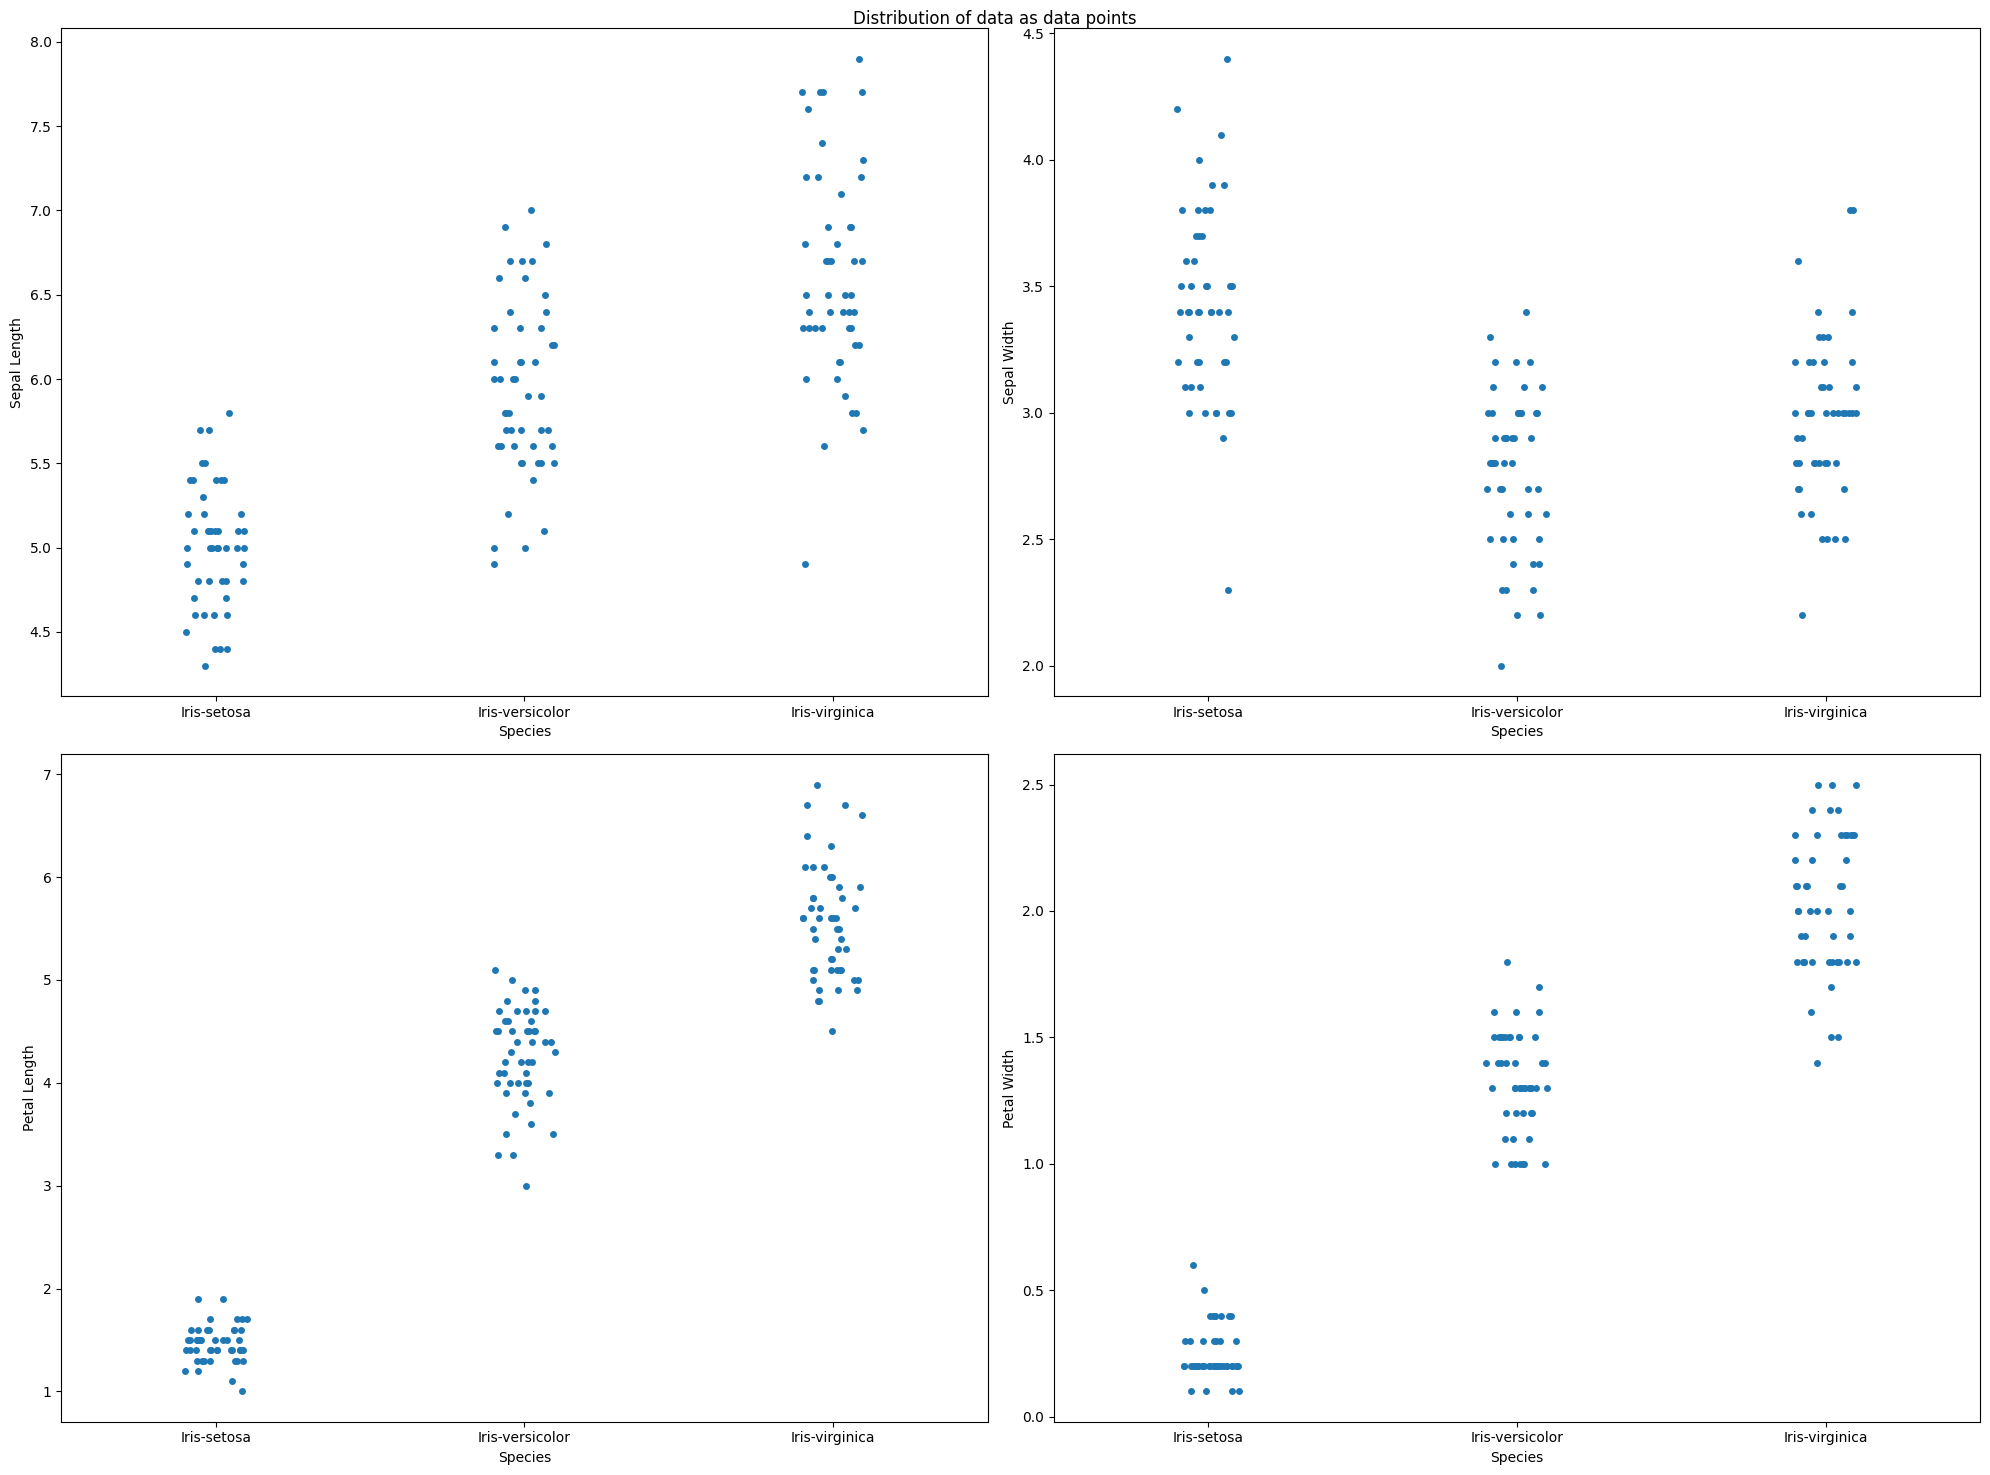

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle('Distribution of data as data points')
for i in range(0,len(columns)-1):
  plt.subplot(2,2,i+1)
  sns.stripplot(x='Species',y=columns[i],data=df)

  plt.tight_layout()

<ipython-input-18-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

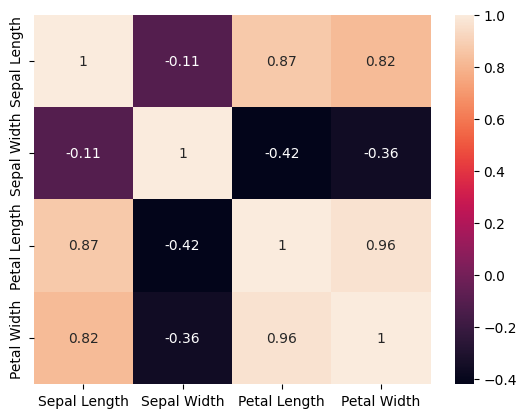

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [ ]:
df[df['Species']==1]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [ ]:
X=df.drop('Species',axis=1)
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y=df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

# TRAIN TEST DATA SPLIT

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.3,random_state=42)

# LOGISTIC REGRESSION

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_test=model.predict(x_test)
y_pred_train=model.predict(x_train)

In [ ]:
cols=['Model','Testing Data Accuracy','Training Data Accuracy']
acDet=pd.DataFrame(columns=cols)
print(acDet)

Empty DataFrame
Columns: [Model, Testing Data Accuracy, Training Data Accuracy]
Index: []


##Function for printing the accuracy of both training and testing data

In [ ]:
def accScore(y_train,y_pred_train,y_test,y_pred_test,modelName):
  global acDet
  trainAcc=accuracy_score(y_train,y_pred_train)*100
  testAcc=accuracy_score(y_test,y_pred_test)*100
  print(f"Accuracy of training model : {trainAcc}")
  print(f"Accuracy of testing model : {testAcc}")
  values={'Model':modelName,'Testing Data Accuracy':testAcc,'Training Data Accuracy':trainAcc}
  acDet=pd.concat([acDet,pd.DataFrame([values],columns=cols)],ignore_index=True)


In [ ]:
accScore(y_train,y_pred_train,y_test,y_pred_test,'Logistic Regression')

Accuracy of training model : 99.01960784313727
Accuracy of testing model : 93.33333333333333


## Function for automating the assessment of model

In [ ]:
def report(y_test,y_pred,desc):
  print(f'Confusion Matrix of {desc}')
  cm=confusion_matrix(y_test,y_pred)
  sns.heatmap(cm,annot=True)
  acc=(accuracy_score(y_test,y_pred))*100
  print(f'Accuracy Score: {acc}')
  report=classification_report(y_test,y_pred)
  print(report)

Confusion Matrix of Testing Data
Accuracy Score: 93.33333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



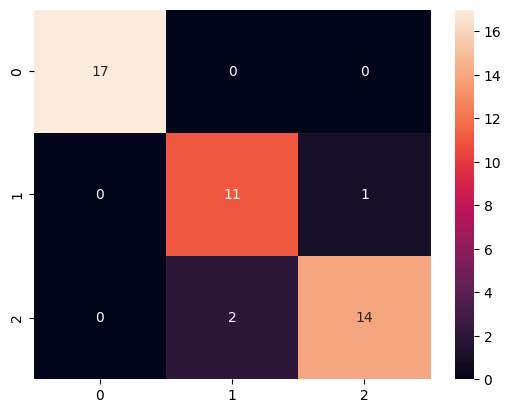

In [ ]:
report(y_test,y_pred_test,'Testing Data')

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [[-0.48464574  0.79618033 -2.3321891  -0.91920188]
 [ 0.48067864 -0.17652171 -0.24197778 -0.72100369]
 [ 0.0039671  -0.61965862  2.57416687  1.64020557]]
Intercept: [  9.91452801   1.83997018 -11.75449819]


In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5)
for i in cv_scores:
  print(i)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9666666666666667
0.9666666666666667
0.9310344827586207
0.9310344827586207
1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#DECISION TREE CLASSIFIER

In [ ]:
data=pd.DataFrame()
data[['Max_depth','Accuracy Score']]=range(1,51),None
for i in range(1,51):
  model=DecisionTreeClassifier(max_depth=i,splitter='best',random_state=42)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  data.loc[data['Max_depth'] ==i, 'Accuracy Score'] = (accuracy_score(y_test,y_pred))*100

data




/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


,Max_depth,Accuracy Score
0,1,64.444444
1,2,88.888889
2,3,97.777778
3,4,93.333333
4,5,93.333333
5,6,93.333333
6,7,93.333333
7,8,93.333333
8,9,93.333333
9,10,93.333333


Accuracy of training model : 98.0392156862745
Accuracy of testing model : 97.77777777777777
Confusion Matrix of Testing data
Accuracy Score: 97.77777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



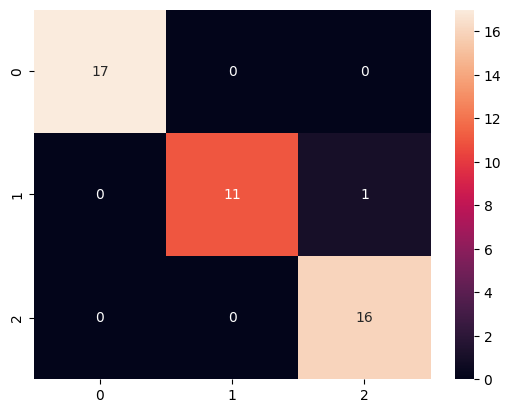

In [ ]:
model2=DecisionTreeClassifier(max_depth=3,splitter='best',random_state=42)
model2.fit(x_train,y_train)
y_pred_test=model2.predict(x_test)
y_pred_train=model2.predict(x_train)
accScore(y_train,y_pred_train,y_test,y_pred_test,'Decision Tree Classifier')
report(y_test,y_pred_test,'Testing data')


#RANDOM FOREST CLASSIFIER

In [ ]:
n_estimators=[int(i) for i in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt','log2']
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
max_depth=[int(i) for i in np.linspace(start=5,stop=30,num=6)]
bootstrap=[True,False]
random_grid_rfc= {'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf, 'bootstrap' : bootstrap}
print(random_grid_rfc)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
model3=RandomForestClassifier(random_state=42)
rfc=RandomizedSearchCV(estimator=model3,param_distributions=random_grid_rfc,cv=5,n_jobs=1,random_state=42,return_train_score=True)
rfc_model=rfc.fit(x_train,y_train)
print(rfc.best_params_)

{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


In [ ]:
y_pred_test=rfc_model.predict(x_test)
y_pred_train=rfc_model.predict(x_train)

In [ ]:
print(y_pred_test)

[2 1 2 0 1 0 1 0 2 0 0 1 2 1 2 1 0 1 2 0 0 2 0 2 1 0 1 2 1 0 2 0 2 0 0 2 2
 2 0 0 0 2 1 2 1]


In [ ]:
accScore(y_train,y_pred_train,y_test,y_pred_test,'Random Forest Classifier')

Accuracy of training model : 99.01960784313727
Accuracy of testing model : 95.55555555555556


Confusion Matrix of Testing data
Accuracy Score: 95.55555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



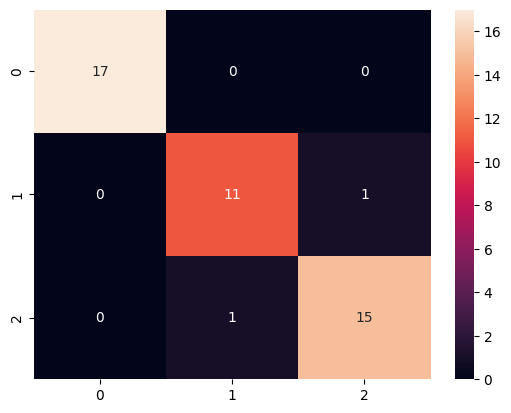

In [ ]:
report(y_test,y_pred_test,'Testing data')

# XGBOOST CLASSIFIER

In [ ]:
n_estimators=[int(i) for i in np.linspace(start=50,stop=1000,num=25)]
max_depth=[int(i) for i in np.linspace(10,80,num=10)]
learning_rate=[0.0001,0.001,0.01,0.1,0.2,0.3]
random_grid_xgb={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'learning_rate' : learning_rate}

In [ ]:
xgbc=XGBClassifier(random_state=42)
xgbc_random=RandomizedSearchCV(estimator=xgbc,param_distributions=random_grid_xgb,n_jobs=-1,random_state=42,cv=5,return_train_score=True)
xgbc_final=xgbc_random.fit(x_train,y_train)
print(xgbc_final.best_params_)

{'n_estimators': 406, 'max_depth': 72, 'learning_rate': 0.3}


In [ ]:
y_pred_train=xgbc_final.predict(x_train)
y_pred_test=xgbc_final.predict(x_test)

In [ ]:
accScore(y_train,y_pred_train,y_test,y_pred_test,'XGBoost Classifier')

Accuracy of training model : 100.0
Accuracy of testing model : 95.55555555555556


Confusion Matrix of Testing
Accuracy Score: 95.55555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



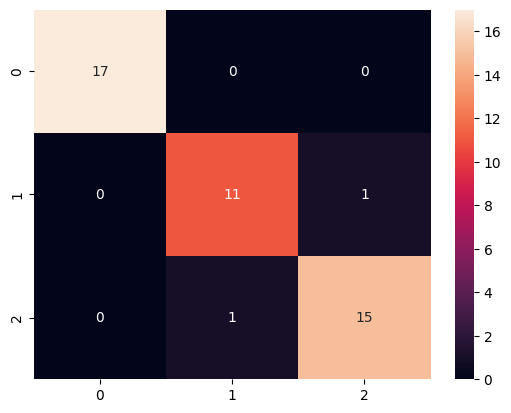

In [ ]:
report(y_test,y_pred_test,'Testing')

In [ ]:
acDet

,Model,Testing Data Accuracy,Training Data Accuracy
0,Logistic Regression,93.333333,99.019608
1,Decision Tree Classifier,97.777778,98.039216
2,Random Forest Classifier,95.555556,99.019608
3,XGBoost Classifier,95.555556,100.000000


**Comparing the above ML models we conclude that Decision Tree Classifier has the highest accuracy and hence we choose Decision Tree Classifier.**